In [63]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
# Reading file
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
pd.set_option('display.max_columns', 21)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
# statistical Property of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [67]:
# statistical Property of Object columns
df.describe(include=[object])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Preprocessing

In [69]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [70]:
# Droping unnecessary columns
df.drop(["customerID"], axis=1, inplace=True)

In [71]:
df.duplicated().sum()

22

In [72]:
df.drop_duplicates(inplace=True)

In [73]:
# Converting TotalCharges from String to Float
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

## Data Visualization

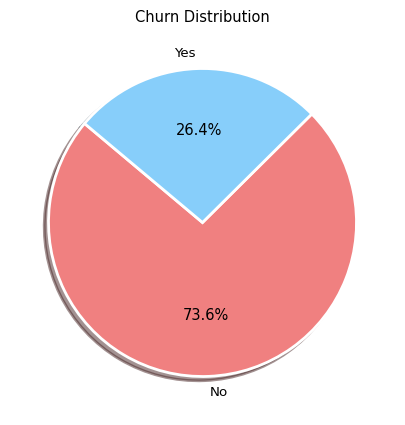

In [74]:
# Function to plot a pie chart for churn distribution
def plot_churn_pie_chart(df):
    churn_counts = df['Churn'].value_counts()
    plt.figure(figsize=(8, 5))
    churn_counts.plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=140,
        colors=['lightcoral', 'lightskyblue'],
        shadow=True,
        wedgeprops={'edgecolor': 'white', 'linewidth': 2}
    )

    plt.title('Churn Distribution')
    plt.ylabel('')
    plt.show()

plot_churn_pie_chart(df)

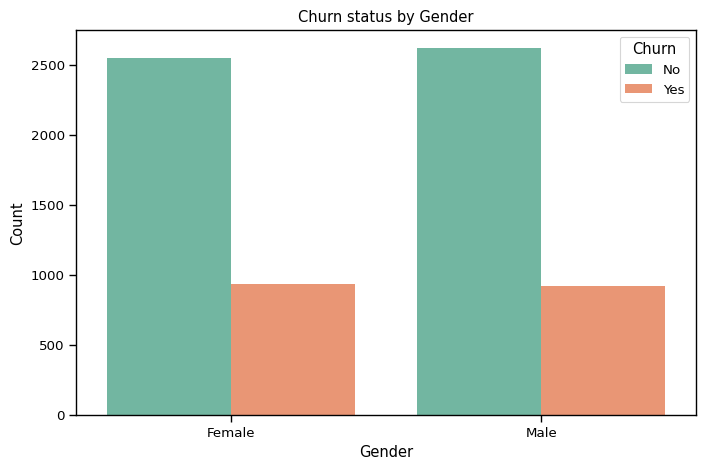

In [75]:
# Function to plot gender by churn status
def plot_churn_by_gender(df):
    plt.figure(figsize=(8, 5))
    sns.countplot(x='gender', hue='Churn', data=df, palette='Set2')
    plt.title('Churn status by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.legend(title='Churn')
    plt.show()

plot_churn_by_gender(df)

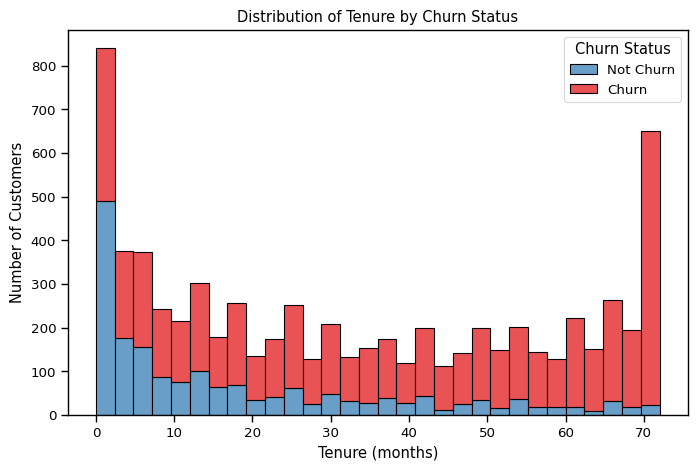

In [76]:
# Function to plot Tenure by Churn status
def plot_tenure_distribution_by_churn(df):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x="tenure", hue="Churn", kde=False, bins=30, multiple="stack", palette="Set1")
    plt.title("Distribution of Tenure by Churn Status")
    plt.xlabel("Tenure (months)")
    plt.ylabel("Number of Customers")
    plt.legend(title='Churn Status', labels=['Not Churn', 'Churn'], loc='upper right')
    plt.show()

plot_tenure_distribution_by_churn(df)

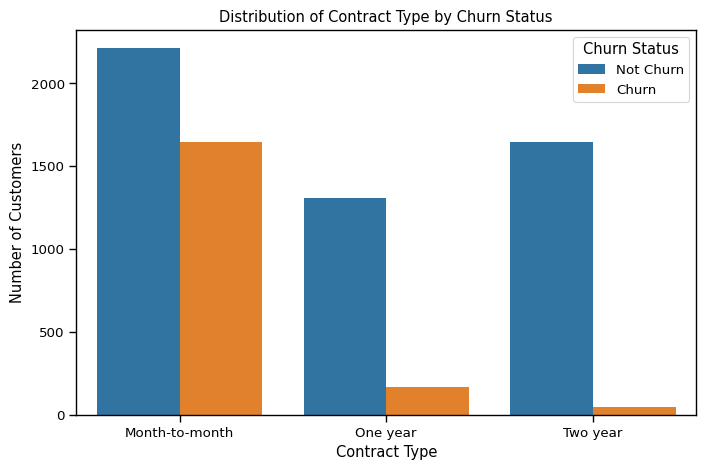

In [77]:
# Function to plot Contract Type by Churn Status
def plot_contract_type_by_churn(df):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x="Contract", hue="Churn")
    plt.title("Distribution of Contract Type by Churn Status")
    plt.xlabel("Contract Type")
    plt.ylabel("Number of Customers")
    plt.legend(title='Churn Status', labels=['Not Churn', 'Churn'], loc='upper right')
    plt.show()

plot_contract_type_by_churn(df)

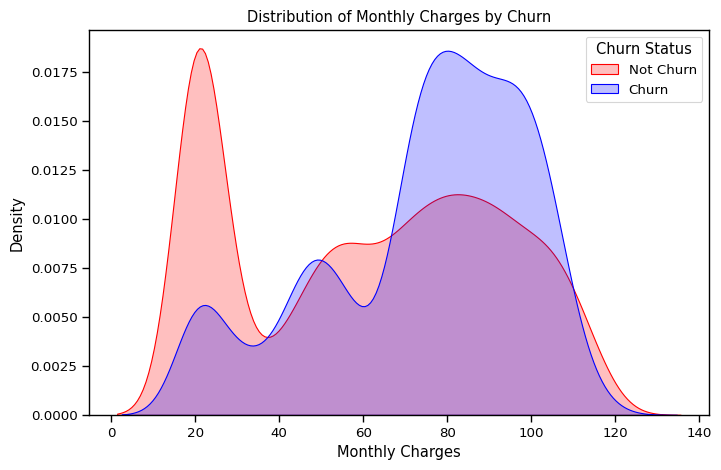

In [78]:
# Function to plot Monthly Charges by Churn status
def plot_monthly_charges_distribution_by_churn(df):
    sns.set_context("paper", font_scale=1.1)
    plt.figure(figsize=(8, 5))
    ax = sns.kdeplot(df['MonthlyCharges'][df['Churn'] == 'No'], color="Red", shade=True)
    ax = sns.kdeplot(df['MonthlyCharges'][df['Churn'] == 'Yes'], ax=ax, color="Blue", shade=True)
    legend = ax.legend(title='Churn Status', labels=['Not Churn', 'Churn'], loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel('Monthly Charges')
    ax.set_title('Distribution of Monthly Charges by Churn')
    plt.show()

plot_monthly_charges_distribution_by_churn(df)

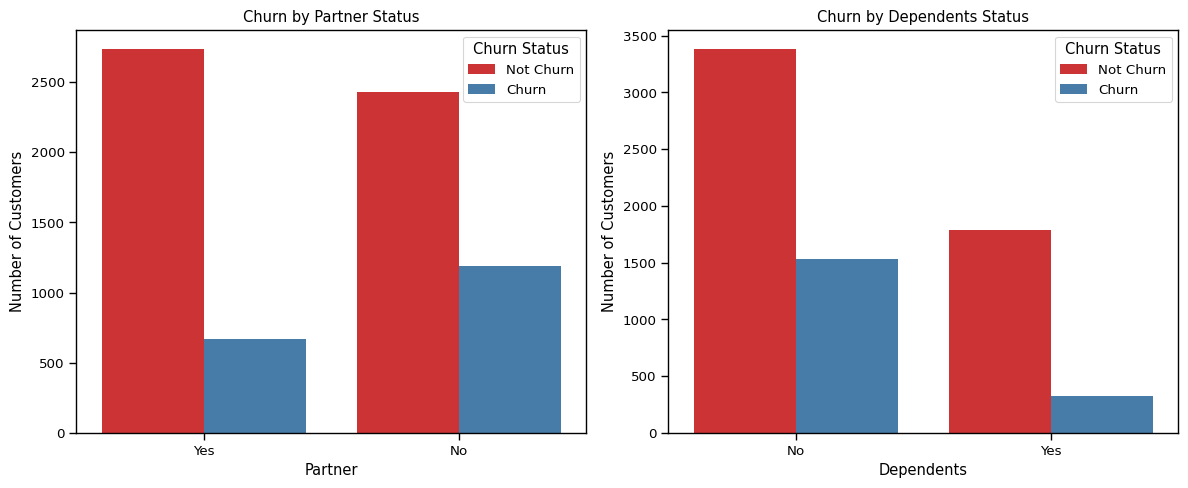

In [79]:
# Function to Plot churn by partner and dependents status
def plot_partner_dependents_by_churn(df):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x='Partner', hue='Churn', palette="Set1")
    plt.title("Churn by Partner Status")
    plt.xlabel("Partner")
    plt.ylabel("Number of Customers")
    plt.legend(title='Churn Status', labels=['Not Churn', 'Churn'])

    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x='Dependents', hue='Churn', palette="Set1")
    plt.title("Churn by Dependents Status")
    plt.xlabel("Dependents")
    plt.ylabel("Number of Customers")
    plt.legend(title='Churn Status', labels=['Not Churn', 'Churn'])
    plt.tight_layout()
    plt.show()

plot_partner_dependents_by_churn(df)